In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List

In [21]:
def lehmer_generator(u0: int, m: int, c: int, p: int, max_iter: int = 10_000) -> List[int]:
    u = u0
    for _ in range(max_iter):
        yield u
        u = (u * m + c) % p
    yield u


def test_unicable(values: List[int]) -> bool:
    return len(set(values)) == len(values)


def test_randomness(values: List[int], values_median: float) -> float:
    runs, n1, n2 = 0, 0, 0
      
    for i in range(len(values)):
        if (values[i] >= values_median and values[i-1] < values_median) or (values[i] < values_median and values[i-1] >= values_median):
            runs += 1  
          
        if(values[i]) >= values_median:
            n1 += 1   
          
        else:
            n2 += 1   
  
    runs_exp = ((2 * n1 * n2) / (n1 + n2)) + 1
    stan_dev = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / (((n1 + n2) ** 2) * (n1 + n2 - 1)))
    
    return (runs - runs_exp) / stan_dev


In [22]:
values = list(list(lehmer_generator(112312, 2312321, 331213, 20000)))

In [27]:
unicable = test_unicable(values)

print(f'Все элементы уникальны - {"Да" if unicable else "Нет"}')

Все элементы уникальны - Да


In [28]:
z = test_randomness(values, np.median(values))

if np.abs(z) > 1.96:
    print("Значения последовательности неслучайны")
else:
    print("Значения последовательности случайны")

Значения последовательности случайны


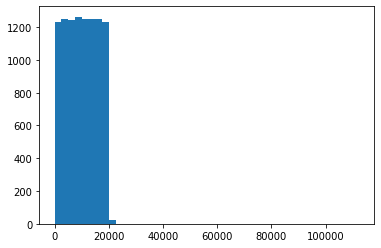

In [29]:
plt.hist(values, bins=45)
plt.show()